## Insights and Visualization

The libraries and magic functions used for this visualization part are as below:

- import matplotlib.pyplot as plt
- import seaborn as sns
- sns.set_style('darkgrid')
- %matplotlib inline

##### 1. What is the dog scores trend?

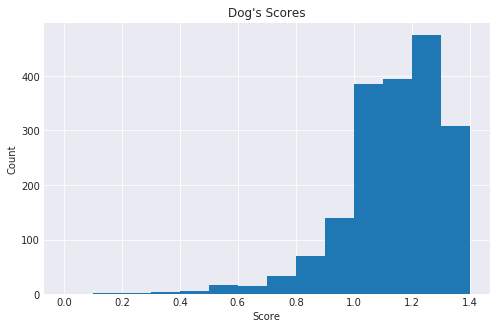

In [84]:
df_clean['scores'].plot('hist',figsize=(8,5),bins=14)
plt.ylabel('Count')
plt.xlabel('Score')
plt.title('Dog\'s Scores');


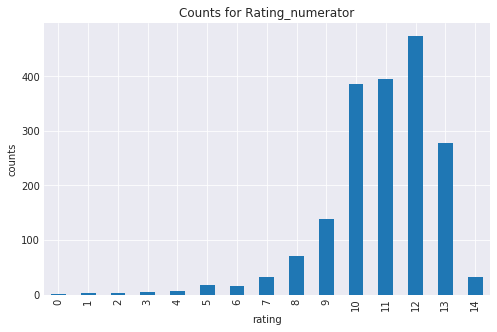

In [76]:
df_clean.rating_numerator.value_counts().sort_index().plot(kind='bar',figsize=(8,5))
plt.xlabel('rating')
plt.ylabel('counts')
plt.title('Counts for Rating_numerator');

The visualization above shows the histogram for the scores of the dogs. The wey this score value is calculated is by dividing the numerator value with the denominator value. As we can see here the histogram are left skewed which also mean that the mean which is 1.01 is less than the median which is 1.1. Besides, this also show that low rating are less likely to be given to rate the dogs. The common scores is between 1.0 to 1.3 while 12/10 being the most common rating given which is the highest peak in the histogram above or known as the mode.

##### 2. Does tweet with high favorite_count is more likely to be retweeted? are they related to each other?

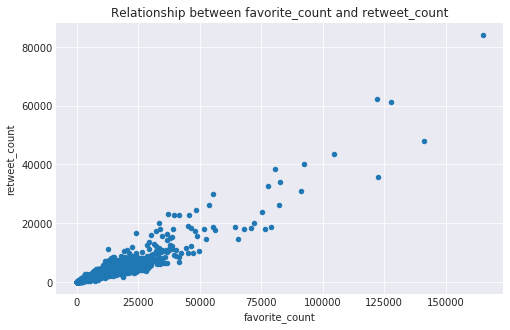

In [77]:
df_clean.plot(x='favorite_count',y='retweet_count',kind='scatter',figsize=(8,5))
plt.title('Relationship between favorite_count and retweet_count');

In [67]:
df_clean.favorite_count.describe()

count    1855.000000  
mean     8928.125067  
std      13069.304225 
min      51.000000    
25%      2013.000000  
50%      4086.000000  
75%      11002.000000 
max      164943.000000
Name: favorite_count, dtype: float64

In [101]:
df_clean.favorite_count.max()
df_clean.query('favorite_count == 164943')

,tweet_id,retweet_count,favorite_count,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,scores
1025,744234799360020481,84083,164943,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13,10,Unknown,doggo,1.3


From the above scatter plot we can see the strong positive correlation between the favorite count and the retweet count. Tweets that have high favorite counts are most likely to have high retweet count as well.

There is only one of the tweet that surpass 150000 favourites count and having the highest retweet count of more than 80000. It is a funny video of a doggo standing inside a pool when he realized that his feet touches the bottom of the pool. See picture below.

<img src="image.png" alt="Drawing" style="width: 400px;"/>


##### 3.  Is there any relationship between rating and favorite?

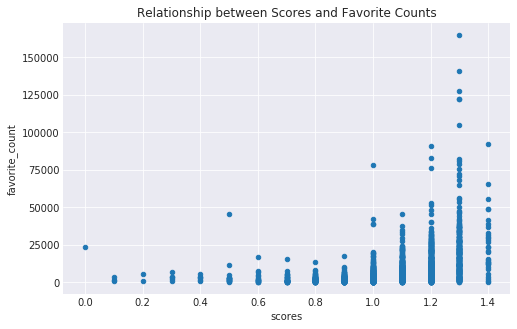

In [91]:
df_clean.query('favorite_count > 0').plot(x='scores',y='favorite_count',kind='scatter',figsize=(8,5))
plt.title('Relationship between Scores and Favorite Counts');

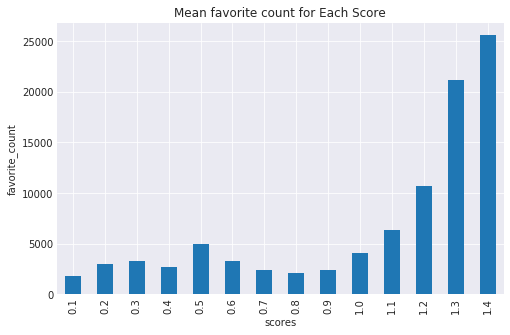

In [107]:
rating_fav=df_clean.query('scores > 0').groupby('scores').favorite_count.mean()
rating_fav.plot(kind='bar',figsize=(8,5))
plt.ylabel('favorite_count')
plt.title('Mean favorite count for Each Score');


The scatter plot shows that there is no correlation between the scores and the favorite counts. However from the bar chart above, it is obvious that dogs with higher scores get higher favorite counts for scores 1 and above. Meanwhile for the score below than 1, there is no trend in their the favorite counts.

##### 4. What is the most famous names for dogs?

In [70]:
df_clean.query('name != "Unknown"').name.value_counts()


Lucy            11
Cooper          10
Tucker          9 
Charlie         9 
Oliver          9 
Penny           8 
Lola            7 
Winston         7 
Daisy           7 
Sadie           7 
Toby            6 
Oscar           6 
Koda            6 
Jax             6 
Bella           5 
Bo              5 
Bailey          5 
Bentley         5 
Stanley         5 
Leo             5 
Rusty           5 
Brody           4 
Cassie          4 
Scout           4 
George          4 
Dave            4 
Winnie          4 
Duke            4 
Scooter         4 
Boomer          4 
               .. 
Orion           1 
Schnozz         1 
Baxter          1 
Stark           1 
Doobert         1 
Filup           1 
Rizzo           1 
Atticus         1 
Spanky          1 
Kenny           1 
Philbert        1 
Eugene          1 
Amy             1 
Vinnie          1 
Ralphé          1 
Simba           1 
Ace             1 
Jameson         1 
Terrance        1 
Lulu            1 
Tebow           1 
Stuart      

Lucy ranked first as the famous names for dogs and Cooper ranked second.

##### 5. Does younger dog's typically get higher rating than older dog?

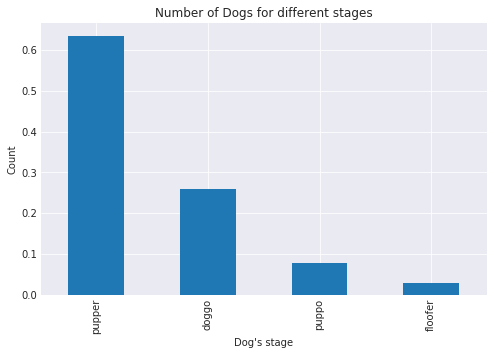

In [86]:
dogstage_prop=df_clean.dog_stage.value_counts()/df_clean.dog_stage.count()
dogstage_prop.plot('bar',figsize=(8,5))
plt.ylabel('Count')
plt.xlabel('Dog\'s stage')
plt.title('Number of Dogs for different stages');

In [78]:
sample=df_clean.groupby('dog_stage').scores.mean()
sample

dog_stage
doggo      1.180519
floofer    1.188889
pupper     1.095767
puppo      1.200000
Name: scores, dtype: float64

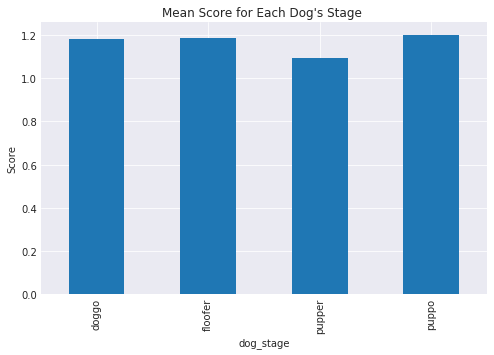

In [85]:
sample.plot(kind='bar',figsize=(8,5))
plt.ylabel('Score')
plt.title('Mean Score for Each Dog\'s Stage ');

Bar chart above show the proportions of the dogs for their stages which could be either doggo, puppo, pupper or floofer. This proportion are calculated based on the data with their dog_stage are known. Which means, dogs with unknown stage are not considered in this calculation.  

From the chart above,more than half of dog pictures posted by the twitter users to be rated by WeRateDogs are pupper followed by doggo,puppo and floofer.

However, based on the mean scores for each of the stages, their scores do not differ much except for pupper, which gets one unit of rating less than the other. All three for duggo,puppo and floofer received mean rating of 12/10 while pupper got 11/10.

This concluded that neither younger dog nor floofer dog tends to get higher rating and the dog's stage and scores doesn't correlate to each other.